In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/Users/govindd1/Desktop/Code/VR-Project/ACC_data_from_different_subjects/E4_ACC_data_3.csv')
df = df.drop('round', 1)
df.head()

C:\Users\govindd1\AppData\Local\Temp/ipykernel_8072/708278336.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('round', 1)


,datetime,acc_x,acc_y,acc_z,subject_id,type,label
0,2021-12-08 14:50:11+00:00,-6,22,62,3,InMotion,downstairs
1,2021-12-08 14:50:11.031250+00:00,-7,20,61,3,InMotion,downstairs
2,2021-12-08 14:50:11.062500+00:00,-7,18,59,3,InMotion,downstairs
3,2021-12-08 14:50:11.093750+00:00,-8,16,58,3,InMotion,downstairs
4,2021-12-08 14:50:11.125000+00:00,-7,16,57,3,InMotion,downstairs


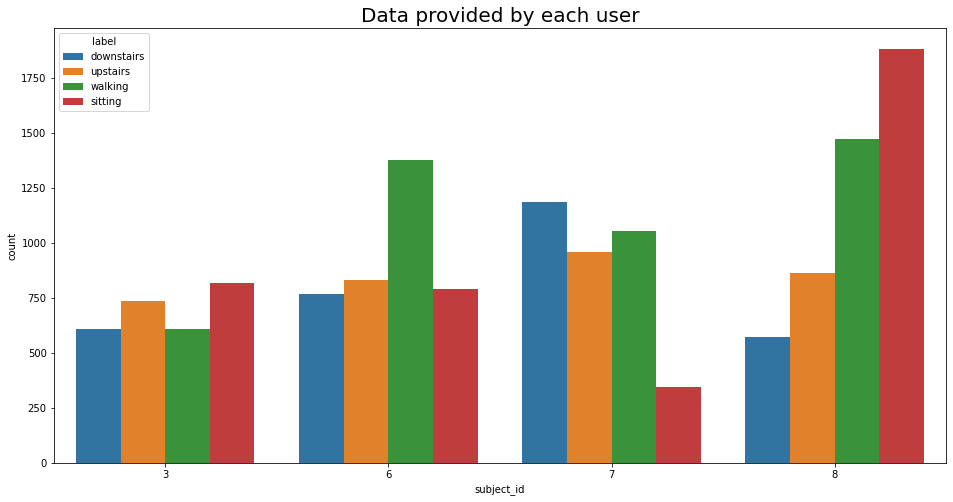

In [3]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = df)
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
# df['activity'] = label.fit_transform(df['label'])
df['type_encoded'] = label.fit_transform(df['type'])
label.classes_
df

,datetime,acc_x,acc_y,acc_z,subject_id,type,label,activity,type_encoded
0,2021-12-08 14:50:11+00:00,-6,22,62,3,InMotion,downstairs,0,0
1,2021-12-08 14:50:11.031250+00:00,-7,20,61,3,InMotion,downstairs,0,0
2,2021-12-08 14:50:11.062500+00:00,-7,18,59,3,InMotion,downstairs,0,0
3,2021-12-08 14:50:11.093750+00:00,-8,16,58,3,InMotion,downstairs,0,0
4,2021-12-08 14:50:11.125000+00:00,-7,16,57,3,InMotion,downstairs,0,0
...,...,...,...,...,...,...,...,...,...
14875,2021-12-09 03:01:44.718750+00:00,-14,3,61,8,MotionLess,sitting,1,1
14876,2021-12-09 03:01:44.750000+00:00,-14,3,61,8,MotionLess,sitting,1,1
14877,2021-12-09 03:01:44.781250+00:00,-14,3,61,8,MotionLess,sitting,1,1
14878,2021-12-09 03:01:44.812500+00:00,-14,4,61,8,MotionLess,sitting,1,1


In [16]:
from sklearn.preprocessing import StandardScaler

X = df[['acc_x', 'acc_y', 'acc_z']]
# y = df['activity']
y = df['type_encoded']
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # scaled_X = pd.DataFrame(data = X, columns = ['accXmean',	'accYmean',	'accZmean',	'accXstd',	'accYstd',	'accZstd',	'MagnitudeMean', 'covXYmean',	'covYZmean',	'covXZmean'])
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

array([[-0.62591995,  0.17729949, -0.08863181],
       [-0.52905976,  0.6644736 ,  0.94047047],
       [ 0.63326258, -0.62841153, -0.41607344],
       ...,
       [ 1.69872473, -1.2467479 , -2.2871685 ],
       [ 0.43954219, -0.60967407, -0.18218656],
       [ 0.2458218 , -0.66588646, -0.08863181]])

Accuracy: 0.9516129032258065

 ------------------------------------------ RandomForestClassifier() Classification Report-------------------------------------------------

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2172
           1       0.94      0.87      0.91       804

    accuracy                           0.95      2976
   macro avg       0.95      0.93      0.94      2976
weighted avg       0.95      0.95      0.95      2976

 ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------


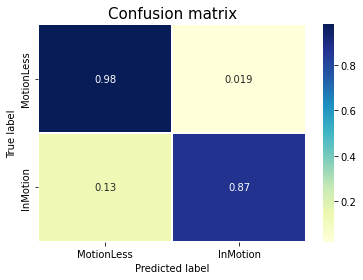

----------------------------------------------  RandomForestClassifier() K-Fold Report  ------------------------------------------------------ 

 * Results: [0.94959677 0.95497312 0.95396505 0.96068548]

 * Average acuracy: 0.9548051075268817 

<--------------------------------------------------------   END   ------------------------------------------------------------------>


In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



classifiers = [
# KNeighborsClassifier(3),
# SVC(kernel="rbf", C=0.025, probability=True)
# NuSVC(probability=True),
RandomForestClassifier()
# DecisionTreeClassifier()
# AdaBoostClassifier()
# GradientBoostingClassifier()
]
for classifier in classifiers:
# pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                   ('classifier', classifier)])
# pipe.fit(X_train, y_train)   
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n ------------------------------------------", classifier , "Classification Report-------------------------------------------------\n")
    print(classification_report(y_test, y_pred))    


# K-Fold 
kfold = 4
results = cross_val_score(classifier, X_train, y_train, cv=kfold)


print(" ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------")
# labels = ['walking', 'sitting',  'upstairs', 'downstairs']
labels = ['MotionLess', 'InMotion']
_y_test = y_test
_y_pred = y_pred
confusion_matrix = confusion_matrix(_y_test, _y_pred)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, cmap = "YlGnBu")
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# print(" ------------------------------------------------------ AUC SCORE -------------------------------------------------------------------")
# skplt.metrics.plot_roc_curve(y_test, y_pred)
# plt.show()
    
print("---------------------------------------------- ", classifier , "K-Fold Report  ------------------------------------------------------", "\n")
# print("model score: %.3f" % pipe.score(X_test, y_test))
# print('------------------------------------   REPORT   ----------------------------------', "\n")
print(' * Results: {}'.format(results))
print('\n * Average acuracy: {}'.format(np.mean(results)), "\n")

print('<--------------------------------------------------------   END   ------------------------------------------------------------------>')

In [19]:
y_pred


array([0, 0, 0, ..., 0, 0, 0])

Area Under the Curve Score :  0.9738551143912116


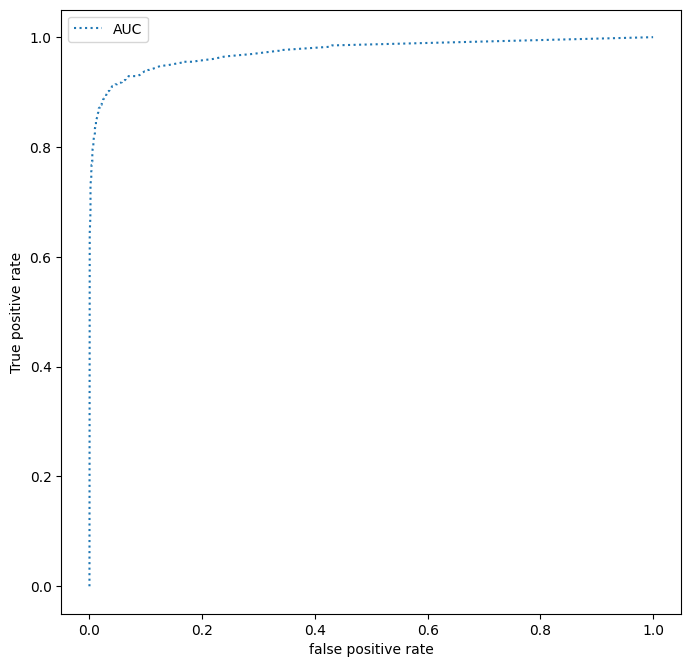

In [18]:

from sklearn.metrics import roc_auc_score, roc_curve, auc

y_pred_probabilty = classifier.predict_proba(X_test)
print("Area Under the Curve Score : ", roc_auc_score(y_test, y_pred_probabilty[:,1]))


fpr, tpr, threshold = roc_curve(y_test, y_pred_probabilty[:,1])
auc = auc(fpr, tpr)

plt.figure(figsize=(8,8), dpi = 100)
plt.plot(fpr, tpr, linestyle = ':', label = 'AUC')

plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()




In [ ]:


from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

subject_ids = list(df.subject_id.unique())
subject_ids

LOOCV_accuracy = []
LOOCV_f1 = []
y_preds = []
y_tests = []



for subject in subject_ids:
    test = df.loc[df['subject_id']==subject]
    train = df.loc[df['subject_id']!=subject]
    
    
    train = train[['acc_x',	'acc_y', 'acc_z',	'activity']]
    test = test[['acc_x',	'acc_y', 'acc_z',	'activity']]
    
    X_train = train.iloc[:, :-1].values
    y_train = train.iloc[:, -1].values
    X_test = test.iloc[:, :-1].values
    y_test = test.iloc[:, -1].values
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #Random Forest model
    clf = RandomForestClassifier(n_estimators=750,
    random_state=1337,
    max_depth=25,
    min_samples_leaf=1, class_weight='balanced_subsample' )
    
    #Fit and Predict using RF model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_preds = y_pred
    y_tests = y_test
    #Print Accuracy Score
    print('Completed LOOCV for Subject ', +  subject)
    
    LOOCV_accuracy.append(accuracy_score(y_test, y_pred))
    LOOCV_f1.append(f1_score(y_test, y_pred,average='weighted'))
    
    
    

In [ ]:
LOOCV_accuracy


In [ ]:
group_by_label = df.groupby(by=['subject_id'])
gpdf3 = group_by_label.get_group(3)

In [ ]:
gpdf3

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = gpdf3)
plt.show()

In [ ]:
X = gpdf3[['acc_x', 'acc_y', 'acc_z']]
y = gpdf3['label']

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from collections import Counter


y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


In [ ]:
group_by_label = df.groupby(by=['subject_id'])
gpdf6 = group_by_label.get_group(6)
# gpdf6
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = gpdf6)
X = gpdf6[['acc_x', 'acc_y', 'acc_z']]
y = gpdf6['label']

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from collections import Counter


y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()
plt.show()

In [ ]:
group_by_label = df.groupby(by=['subject_id'])
gpdf7 = group_by_label.get_group(7)
# gpdf7
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = gpdf7)
X = gpdf7[['acc_x', 'acc_y', 'acc_z']]
y = gpdf7['label']

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from collections import Counter


y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()
plt.show()

In [ ]:
group_by_label = df.groupby(by=['subject_id'])
gpdf8 = group_by_label.get_group(8)
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = gpdf8)
X = gpdf8[['acc_x', 'acc_y', 'acc_z']]
y = gpdf8['label']

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from collections import Counter


y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()
plt.show()

In [ ]:
frames = [gpdf6, gpdf3, gpdf7, gpdf8]
df3 = pd.concat(frames)
df3

In [ ]:
df3.subject_id.value_counts()

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df3[['acc_x', 'acc_y', 'acc_z']]
y = df3['activity']
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # scaled_X = pd.DataFrame(data = X, columns = ['accXmean',	'accYmean',	'accZmean',	'accXstd',	'accYstd',	'accZstd',	'MagnitudeMean', 'covXYmean',	'covYZmean',	'covXZmean'])
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



classifiers = [
# KNeighborsClassifier(3),
# SVC(kernel="rbf", C=0.025, probability=True)
# NuSVC(probability=True),
RandomForestClassifier()
# DecisionTreeClassifier()
# AdaBoostClassifier()
# GradientBoostingClassifier()
]
for classifier in classifiers:
# pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                   ('classifier', classifier)])
# pipe.fit(X_train, y_train)   
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n ------------------------------------------", classifier , "Classification Report-------------------------------------------------\n")
    print(classification_report(y_test, y_pred))    


# K-Fold 
kfold = 4
results = cross_val_score(classifier, X_train, y_train, cv=kfold)


print(" ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------")
# labels = ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']
labels = ['MotionLess', 'InMotion']
_y_test = y_test
_y_pred = y_pred
confusion_matrix = confusion_matrix(_y_test, _y_pred)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, cmap = "YlGnBu")
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# print(" ------------------------------------------------------ AUC SCORE -------------------------------------------------------------------")
# skplt.metrics.plot_roc_curve(y_test, y_pred)
# plt.show()
    
print("---------------------------------------------- ", classifier , "K-Fold Report  ------------------------------------------------------", "\n")
# print("model score: %.3f" % pipe.score(X_test, y_test))
# print('------------------------------------   REPORT   ----------------------------------', "\n")
print(' * Results: {}'.format(results))
print('\n * Average acuracy: {}'.format(np.mean(results)), "\n")

print('<--------------------------------------------------------   END   ------------------------------------------------------------------>')

In [ ]:
y_pred_probabilty = classifier.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_probabilty[:,1]))


from sklearn.metrics import roc_auc_score, roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred_probabilty[:,1])
auc = auc(fpr, tpr)

plt.figure(figsize=(8,8), dpi = 100)
plt.plot(fpr, tpr, linestyle = ':', label = 'AUC')

plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

subject_ids = list(df3.subject_id.unique())
subject_ids

LOOCV_accuracy = []
LOOCV_f1 = []
y_preds = []
y_tests = []



for subject in subject_ids:
    test = df3.loc[df3['subject_id']==subject]
    train = df3.loc[df3['subject_id']!=subject]
    
    
    train = train[['acc_x',	'acc_y', 'acc_z',	'activity']]
    test = test[['acc_x',	'acc_y', 'acc_z',	'activity']]
    
    X_train = train.iloc[:, :-1].values
    y_train = train.iloc[:, -1].values
    X_test = test.iloc[:, :-1].values
    y_test = test.iloc[:, -1].values
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #Random Forest model
    clf = RandomForestClassifier(n_estimators=750,
    random_state=1337,
    max_depth=25,
    min_samples_leaf=1, class_weight='balanced_subsample' )
    
    #Fit and Predict using RF model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_preds = y_pred
    y_tests = y_test
    #Print Accuracy Score
    print('Completed LOOCV for Subject ', +  subject)
    
    LOOCV_accuracy.append(accuracy_score(y_test, y_pred))
    LOOCV_f1.append(f1_score(y_test, y_pred,average='weighted'))
    
    LOOCV_accuracy

In [ ]:
LOOCV_accuracy

In [ ]:
df

In [ ]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df[(df['subject_id'] == 3) & (df['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'acc_x', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_y', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_z', x = 'datetime', data = data_df)
  plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

In [ ]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df[(df['subject_id'] == 6) & (df['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'acc_x', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_y', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_z', x = 'datetime', data = data_df)
  plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

In [ ]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df[(df['subject_id'] == 8) & (df['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'acc_x', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_y', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_z', x = 'datetime', data = data_df)
  plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

In [ ]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df[(df['subject_id'] == 7) & (df['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'acc_x', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_y', x = 'datetime', data = data_df)
  sns.lineplot(y = 'acc_z', x = 'datetime', data = data_df)
  plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

In [ ]:
df3 = df.copy()
df3['Magnitude'] = np.sqrt(df3['acc_x']**2 + df3['acc_y']**2 + df3['acc_z']**2)
df3['Magnitude']
df3

In [ ]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df3[(df3['subject_id'] == 8) & (df3['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'Magnitude', x = 'datetime', data = data_df)

#   plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

In [ ]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df3[(df3['subject_id'] == 3) & (df3['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'Magnitude', x = 'datetime', data = data_df)

#   plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

In [ ]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df3[(df3['subject_id'] == 7) & (df3['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'Magnitude', x = 'datetime', data = data_df)

#   plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

In [ ]:
for i in [ 'downstairs',  'upstairs', 'walking', 'sitting']:
  data_df = df3[(df3['subject_id'] == 6) & (df3['label'] == i)]
  plt.figure(figsize = (10, 3))
  sns.lineplot(y = 'Magnitude', x = 'datetime', data = data_df)

#   plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

In [ ]:
sns.set_palette("Set1", desat = 0.80)
facetgrid = sns.FacetGrid(df3, hue = "label", size = 6, aspect=2)
facetgrid.map(sns.distplot, 'Magnitude', hist=False).add_legend()
plt.show()

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x = 'label', y = 'Magnitude', data = df3, showfliers = False, saturation=1)
plt.show()


In [ ]:
gpdf3['Magnitude'] = np.sqrt(gpdf3['acc_x']**2 + gpdf3['acc_y']**2 + gpdf3['acc_z']**2)
gpdf3

In [ ]:
gpdf6['Magnitude'] = np.sqrt(gpdf6['acc_x']**2 + gpdf6['acc_y']**2 + gpdf6['acc_z']**2)
gpdf6

In [ ]:
gpdf7['Magnitude'] = np.sqrt(gpdf7['acc_x']**2 + gpdf7['acc_y']**2 + gpdf7['acc_z']**2)
gpdf8['Magnitude'] = np.sqrt(gpdf8['acc_x']**2 + gpdf8['acc_y']**2 + gpdf8['acc_z']**2)



In [ ]:
gpdf3[['Magnitude']].plot(subplots=True, figsize=(33, 10))
gpdf6[['Magnitude']].plot(subplots=True, figsize=(33, 10))
gpdf7[['Magnitude']].plot(subplots=True, figsize=(33, 10))
gpdf8[['Magnitude']].plot(subplots=True, figsize=(33, 10))


In [ ]:
moving Variance
model prediction